In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.2.0
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.8
astunparse                    1.6.3
attrs                         22.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
cached-property               1.5.2
cachetools                    5.2.0
certifi                       2022.6.15
cffi                          1.15.1
charset-normalizer            2.1.1
cycler                        0.11.0
debugpy                       1.6.3
decorator                     5.1.1
defusedxml                    0.7.1
dill                          0.3.5.1
entrypoints                   0.4
etils                         0.7.1
executing                     0.10.0
fastjsonschema                2.16.1
flatbuff

In [2]:
import tensorflow as tf
import os

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = "data"

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Image not in ext list data/happy/football-fans-taking-selfie-during-260nw-1933090130.jpg
Image not in ext list data/happy/o-HAPPY-facebook.jpg
Image not in ext list data/happy/sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list data/happy/.DS_Store
Image not in ext list data/happy/988689_Wallpaper2.jpg
Image not in ext list data/happy/banner-with-diverse-happy-people-group-standing-together-white_90220-141.jpg
Image not in ext list data/happy/1200px-Happy_People.jpg
Image not in ext list data/happy/114QUyfpbMJdeNVGNrfhezA.jpeg
Image not in ext list data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/2F843f1ad6-ccd8-4fc0-a6e0-a80c94e680e12F196bff35_9a51_4202_9454_7745bc1eb863.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/happy/portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data/sad/man-stress-out-cover-his-f

In [12]:
img = cv2.imread(os.path.join("data", "happy", "35438_hd.jpg"))

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape

(649, 1240, 3)

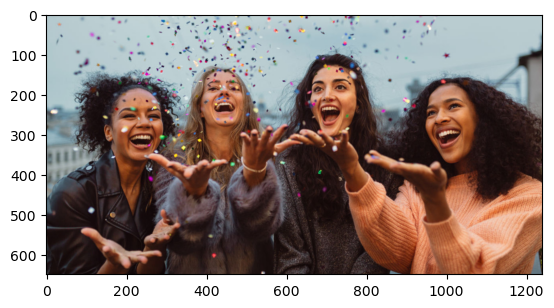

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
print(tf.data.Dataset.list_files)

<function DatasetV2.list_files at 0x11f5e12d0>


In [22]:
import numpy as np

In [23]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 162 files belonging to 2 classes.
Metal device set to: Apple M1


2022-08-25 20:01:32.925592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-25 20:01:32.926227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

2022-08-25 20:03:38.389481: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [29]:
len(batch)

2

In [31]:
batch[0].shape # These are the images represented as numpy arrays

(32, 256, 256, 3)

In [34]:
batch[1] # 0 or 1 represent happy or sad

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int32)

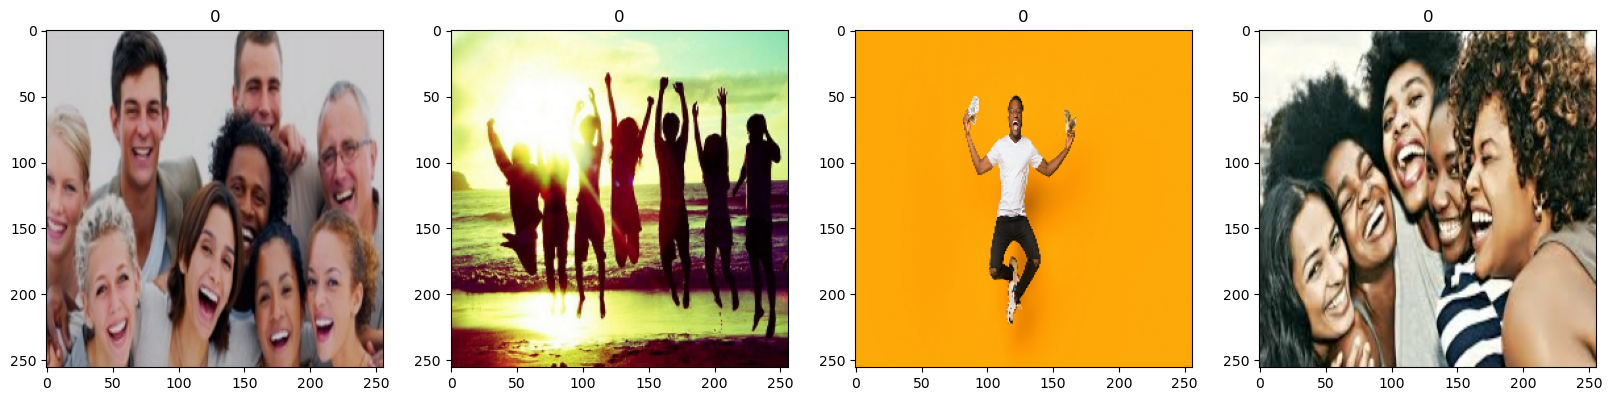

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
data = data.map(lambda x,y: (x/255, y)) # Image array values converted from range 0 to 255 into 0 to 1 range

In [42]:
data.as_numpy_iterator().next()[0].max()

1.0

In [44]:
# splitting the data into training and testing dataset
len(data)

6

In [47]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)+1

In [49]:
train_size + val_size + test_size == len(data)

True

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
len(train), len(val), len(test)

(4, 1, 1)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [62]:
model.layers

In [63]:
len(model.layers)

9

In [64]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [66]:
logdir = "logs"

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-08-25 20:43:46.288208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 1.5756 - accuracy: 0.5703

2022-08-25 20:43:50.446296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 5s 444ms/step - loss: 1.5756 - accuracy: 0.5703 - val_loss: 1.1073 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 2s 395ms/step - loss: 0.7972 - accuracy: 0.4141 - val_loss: 0.6061 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 2s 399ms/step - loss: 0.6277 - accuracy: 0.5469 - val_loss: 0.6191 - val_accuracy: 0.4375
Epoch 4/20
4/4 [==============================] - 2s 390ms/step - loss: 0.5818 - accuracy: 0.5469 - val_loss: 0.5505 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 2s 398ms/step - loss: 0.5621 - accuracy: 0.5781 - val_loss: 0.5512 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 2s 406ms/step - loss: 0.5303 - accuracy: 0.7266 - val_loss: 0.4694 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 2s 389ms/step - loss: 0.5006 - accuracy: 0.7734 - val_loss: 0.4278 - val_accuracy: 1.0000
Epoch 8/20
4/4 [===============

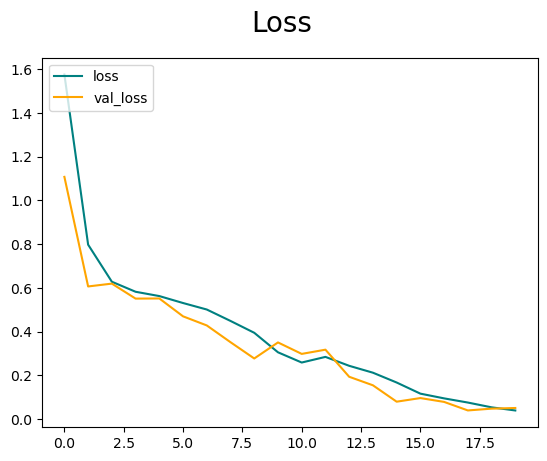

In [69]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2022-08-25 20:50:11.310846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 398ms/step


In [74]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


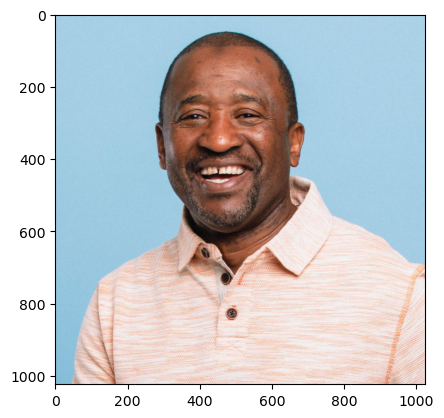

In [85]:
img = cv2.imread(os.path.join("imageclassification", "unseenPerson.jpeg"))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

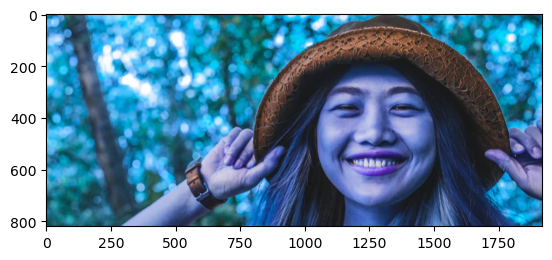

In [86]:
img = cv2.imread(os.path.join("imageclassification", "happyTest.jpg"))
plt.imshow(img)
plt.show()

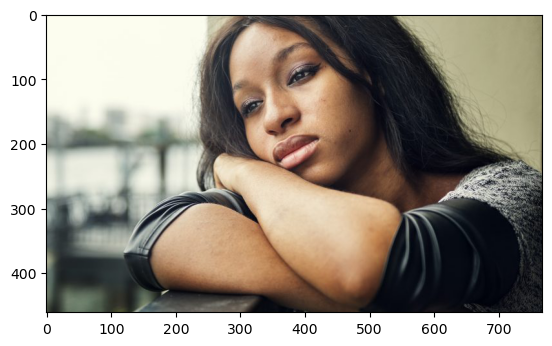

In [91]:
img = cv2.imread(os.path.join("imageclassification", "sadTest.jpg"))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

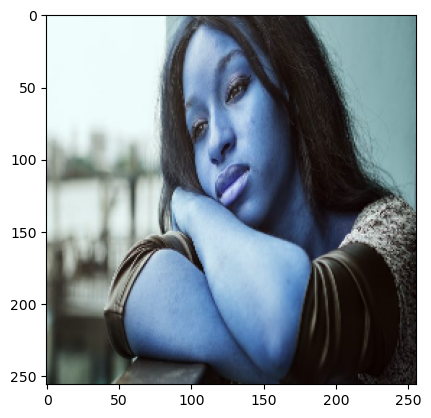

In [92]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


In [94]:
yhat

array([[0.9895354]], dtype=float32)